In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tqdm
import cv2

In [29]:

df = pd.read_csv("Project/Dataset/metadata.csv")

In [30]:
df.head(5)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_confirm_type,image_manipulation,image_type,lesion_id,melanocytic,sex
0,ISIC_0051817,MILK study team,CC-BY-NC,70.0,upper extremity,NaN,True,Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,histopathology,instrument only,dermoscopic,IL_1612768,NaN,male
1,ISIC_0073863,MILK study team,CC-BY-NC,5.0,NaN,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Reed",histopathology,instrument only,dermoscopic,IL_2547802,True,female
2,ISIC_0075884,MILK study team,CC-BY-NC,10.0,upper extremity,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Acral",histopathology,instrument only,clinical: close-up,IL_9270970,True,female
3,ISIC_0076255,MILK study team,CC-BY-NC,50.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_8089688,NaN,female
4,ISIC_0077054,MILK study team,CC-BY-NC,75.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_5271098,NaN,male


In [31]:
df.shape

(10480, 17)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 10480 non-null  object 
 1   attribution             10480 non-null  object 
 2   copyright_license       10480 non-null  object 
 3   age_approx              10440 non-null  float64
 4   anatom_site_general     6568 non-null   object 
 5   anatom_site_special     206 non-null    object 
 6   concomitant_biopsy      10480 non-null  bool   
 7   diagnosis_1             10480 non-null  object 
 8   diagnosis_2             10480 non-null  object 
 9   diagnosis_3             10322 non-null  object 
 10  diagnosis_4             1522 non-null   object 
 11  diagnosis_confirm_type  10480 non-null  object 
 12  image_manipulation      10480 non-null  object 
 13  image_type              10480 non-null  object 
 14  lesion_id               10480 non-null

In [33]:
df.isnull().sum()

isic_id                       0
attribution                   0
copyright_license             0
age_approx                   40
anatom_site_general        3912
anatom_site_special       10274
concomitant_biopsy            0
diagnosis_1                   0
diagnosis_2                   0
diagnosis_3                 158
diagnosis_4                8958
diagnosis_confirm_type        0
image_manipulation            0
image_type                    0
lesion_id                     0
melanocytic                8088
sex                           0
dtype: int64

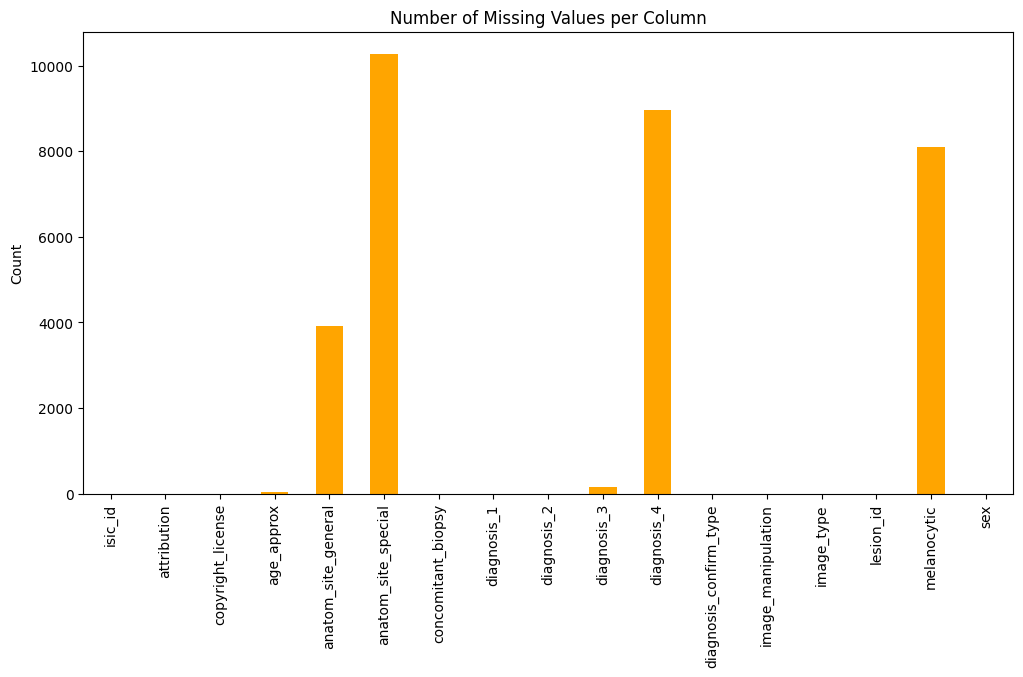

In [34]:
df.isnull().sum().plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Number of Missing Values per Column')
plt.ylabel('Count')
plt.show()


In [35]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])


age_approx              0.381679
anatom_site_general    37.328244
anatom_site_special    98.034351
diagnosis_3             1.507634
diagnosis_4            85.477099
melanocytic            77.175573
dtype: float64


In [36]:
df = df.drop(["anatom_site_special","diagnosis_4","diagnosis_3","diagnosis_2","melanocytic","lesion_id","attribution","copyright_license"], axis=1)


In [37]:
df.shape

(10480, 9)

In [38]:
df.shape

(10480, 9)

In [39]:
df.isnull().sum()

isic_id                      0
age_approx                  40
anatom_site_general       3912
concomitant_biopsy           0
diagnosis_1                  0
diagnosis_confirm_type       0
image_manipulation           0
image_type                   0
sex                          0
dtype: int64

In [40]:
df['age_approx'].describe()

count    10440.000000
mean        61.355364
std         15.691646
min          5.000000
25%         50.000000
50%         65.000000
75%         75.000000
max         85.000000
Name: age_approx, dtype: float64

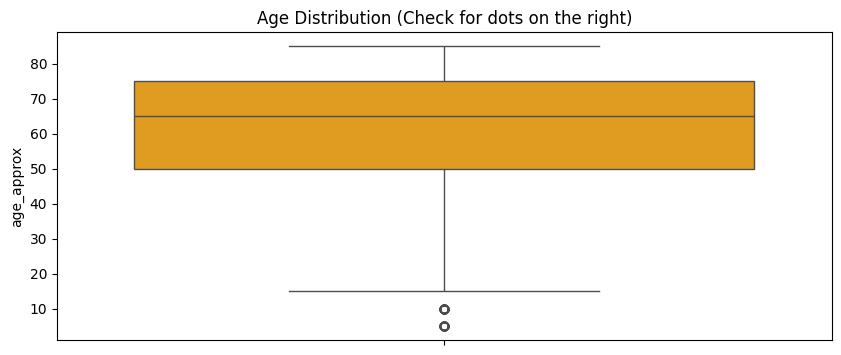

In [41]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['age_approx'], color='orange')
plt.title('Age Distribution (Check for dots on the right)')
plt.show()

In [42]:
median_age = df['age_approx'].median()
df['age_approx'] = df['age_approx'].fillna(median_age)

In [43]:
mode_site = df['anatom_site_general'].mode()[0]
df['anatom_site_general'] = df['anatom_site_general'].fillna(mode_site)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 10480 non-null  object 
 1   age_approx              10480 non-null  float64
 2   anatom_site_general     10480 non-null  object 
 3   concomitant_biopsy      10480 non-null  bool   
 4   diagnosis_1             10480 non-null  object 
 5   diagnosis_confirm_type  10480 non-null  object 
 6   image_manipulation      10480 non-null  object 
 7   image_type              10480 non-null  object 
 8   sex                     10480 non-null  object 
dtypes: bool(1), float64(1), object(7)
memory usage: 665.4+ KB


In [45]:
df.isnull().sum()

isic_id                   0
age_approx                0
anatom_site_general       0
concomitant_biopsy        0
diagnosis_1               0
diagnosis_confirm_type    0
image_manipulation        0
image_type                0
sex                       0
dtype: int64

In [46]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_confirm_type,image_manipulation,image_type,sex
0,ISIC_0051817,70.0,upper extremity,True,Malignant,histopathology,instrument only,dermoscopic,male
1,ISIC_0073863,5.0,head/neck,True,Benign,histopathology,instrument only,dermoscopic,female
2,ISIC_0075884,10.0,upper extremity,True,Benign,histopathology,instrument only,clinical: close-up,female
3,ISIC_0076255,50.0,head/neck,True,Malignant,histopathology,instrument only,dermoscopic,female
4,ISIC_0077054,75.0,head/neck,True,Malignant,histopathology,instrument only,dermoscopic,male


In [47]:
df["diagnosis_1"].value_counts()

diagnosis_1
Malignant        7268
Benign           2966
Indeterminate     246
Name: count, dtype: int64

In [48]:
df['diagnosis_1'] = df['diagnosis_1'].replace('Indeterminate', 'Benign')

In [49]:
cols_to_encode = [
    'anatom_site_general', 
    'concomitant_biopsy', 
    'diagnosis_confirm_type', 
    'image_manipulation', 
    'image_type', 
    'sex'
]

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_target = LabelEncoder()


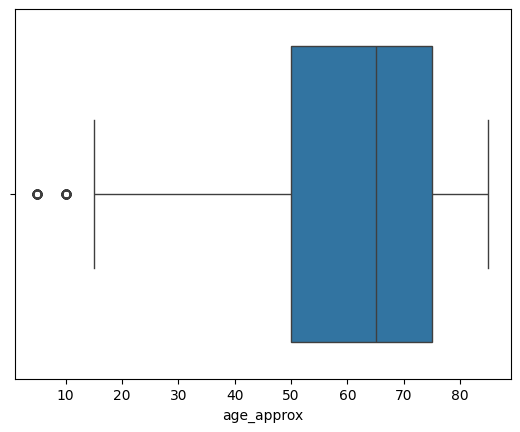

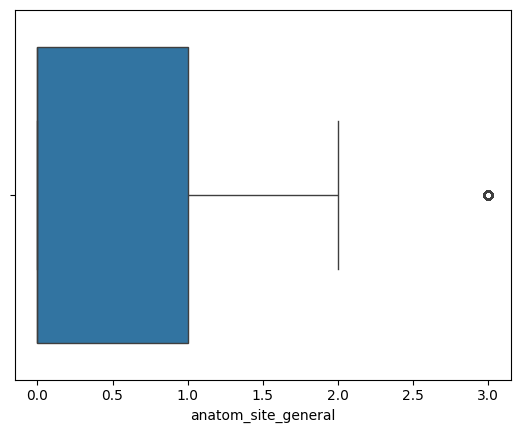

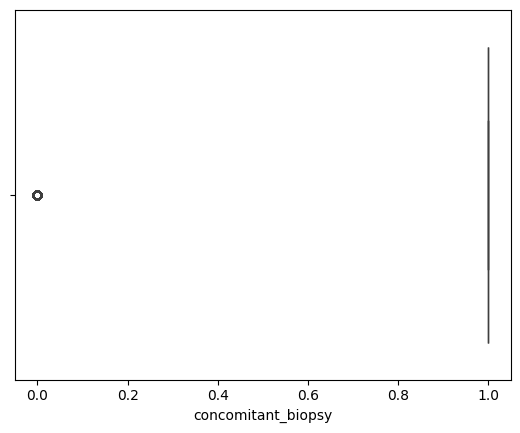

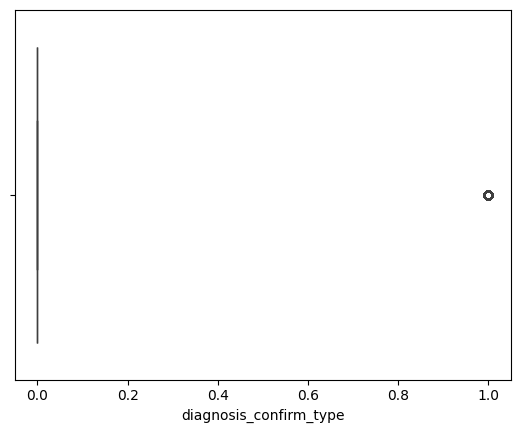

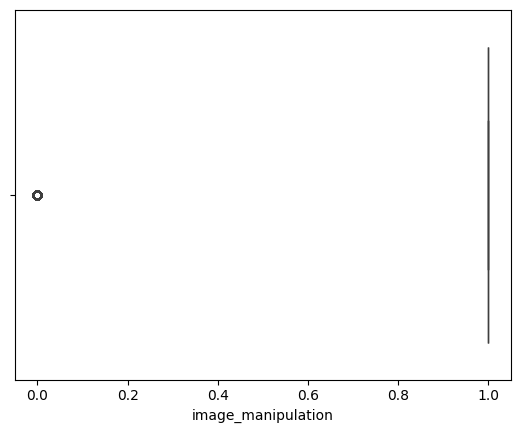

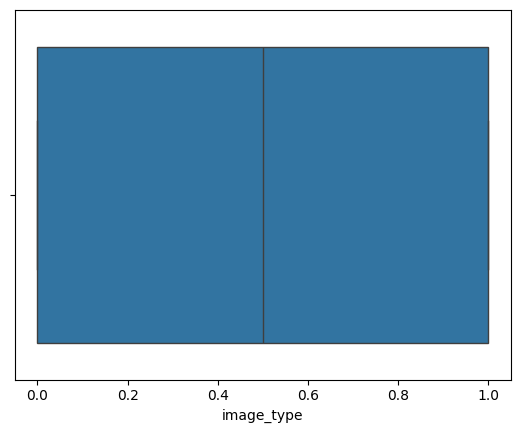

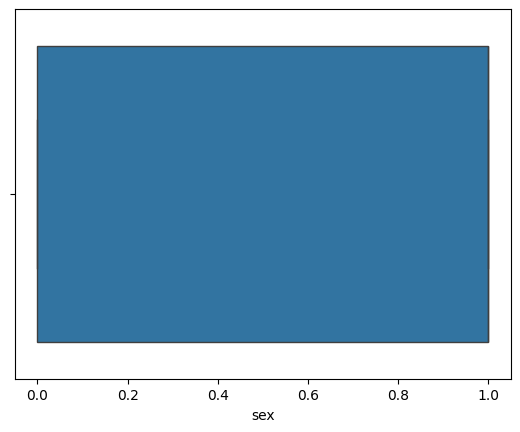

In [50]:
for i in df.select_dtypes(include = "number"):
  sns.boxplot(data = df, x = df[i])
  plt.show()

In [51]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_confirm_type,image_manipulation,image_type,sex
0,ISIC_0051817,70.0,3,1,Malignant,0,1,1,1
1,ISIC_0073863,5.0,0,1,Benign,0,1,1,0
2,ISIC_0075884,10.0,3,1,Benign,0,1,0,0
3,ISIC_0076255,50.0,0,1,Malignant,0,1,1,0
4,ISIC_0077054,75.0,0,1,Malignant,0,1,1,1


In [52]:
df['target'] = le_target.fit_transform(df['diagnosis_1'])
df = df.drop('diagnosis_1', axis=1)


In [53]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target
0,ISIC_0051817,70.0,3,1,0,1,1,1,1
1,ISIC_0073863,5.0,0,1,0,1,1,0,0
2,ISIC_0075884,10.0,3,1,0,1,0,0,0
3,ISIC_0076255,50.0,0,1,0,1,1,0,1
4,ISIC_0077054,75.0,0,1,0,1,1,1,1


In [54]:
dfi = r"D:\mlproject\milk10k\images"
df['image_path'] = dfi + "\\" + df['isic_id'] + ".jpg"


In [55]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target,image_path
0,ISIC_0051817,70.0,3,1,0,1,1,1,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,ISIC_0073863,5.0,0,1,0,1,1,0,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,ISIC_0075884,10.0,3,1,0,1,0,0,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,ISIC_0076255,50.0,0,1,0,1,1,0,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,ISIC_0077054,75.0,0,1,0,1,1,1,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [56]:
df.drop('isic_id', axis=1, inplace=True)

In [57]:
df2 = df[["target", "image_path"]]

In [58]:
df2.head()

,target,image_path
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [59]:
df.drop('image_path', axis=1, inplace=True)

In [60]:
df.head()

,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target
0,70.0,3,1,0,1,1,1,1
1,5.0,0,1,0,1,1,0,0
2,10.0,3,1,0,1,0,0,0
3,50.0,0,1,0,1,1,0,1
4,75.0,0,1,0,1,1,1,1


In [61]:
#df.to_csv("Tabular_data.csv", index=False)

In [62]:
#df2.to_csv("Image_data.csv", index=False)

In [63]:
df2.head()

,target,image_path
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [64]:
IMG_SIZE = (128, 128)
processed_images = []
print("Starting image processing and adding to dataset...")
for path in tqdm.tqdm(df2['image_path']):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img.astype('float32') / 255.0
        processed_images.append(img)
    else:
        processed_images.append(np.zeros((IMG_SIZE[0], IMG_SIZE[1], 3)))
        print(f"Warning: Corrupted image at path {path}")
df2['image_data'] = processed_images
print("Image processing completed successfully!")
print(df2.head())


Starting image processing and adding to dataset...


  1%|          | 128/10480 [00:00<00:08, 1274.33it/s]

  3%|▎         | 312/10480 [00:00<00:06, 1604.07it/s]

  5%|▍         | 473/10480 [00:00<00:06, 1594.62it/s]

  6%|▌         | 633/10480 [00:00<00:06, 1482.49it/s]

  8%|▊         | 794/10480 [00:00<00:06, 1525.26it/s]

  9%|▉         | 950/10480 [00:00<00:06, 1535.63it/s]

 11%|█         | 1118/10480 [00:00<00:05, 1580.78it/s]

 12%|█▏        | 1277/10480 [00:00<00:05, 1562.66it/s]

 14%|█▎        | 1434/10480 [00:00<00:06, 1363.77it/s]

 16%|█▋        | 1710/10480 [00:01<00:06, 1295.94it/s]

 19%|█▉        | 1968/10480 [00:01<00:06, 1226.91it/s]

 20%|██        | 2124/10480 [00:01<00:06, 1319.17it/s]

 23%|██▎       | 2374/10480 [00:01<00:07, 1051.23it/s]

 25%|██▍       | 2606/10480 [00:02<00:07, 1092.88it/s]

 27%|██▋       | 2876/10480 [00:02<00:06, 1213.47it/s]

 30%|██▉       | 3117/10480 [00:02<00:06, 1132.97it/s]

 32%|███▏      | 3365/10480 [00:02<00:06, 1180.76it/s]

 33%|███▎      | 3485/10480 [00:02<00:06, 1057.41it/s]

 35%|███▌      | 3692/10480 [00:03<00:07, 891.38it/s] 

 37%|███▋      | 3883/10480 [00:03<00:07, 896.95it/s]

 39%|███▉      | 4117/10480 [00:03<00:06, 1017.73it/s]

 40%|████      | 4222/10480 [00:03<00:06, 960.61it/s] 

 42%|████▏     | 4404/10480 [00:03<00:08, 749.15it/s]

 44%|████▍     | 4598/10480 [00:04<00:06, 853.96it/s]

 45%|████▍     | 4689/10480 [00:04<00:08, 717.82it/s]

 46%|████▋     | 4865/10480 [00:04<00:07, 779.37it/s]

 49%|████▊     | 5088/10480 [00:04<00:07, 769.10it/s]

 51%|█████     | 5334/10480 [00:05<00:05, 965.06it/s]

 52%|█████▏    | 5437/10480 [00:05<00:05, 898.77it/s]

 57%|█████▋    | 5933/10480 [00:05<00:03, 1418.89it/s]

 58%|█████▊    | 6108/10480 [00:05<00:02, 1512.29it/s]

 60%|█████▉    | 6264/10480 [00:05<00:03, 1058.68it/s]

 61%|██████    | 6392/10480 [00:06<00:04, 832.44it/s] 

 62%|██████▏   | 6497/10480 [00:06<00:05, 747.75it/s]

 64%|██████▍   | 6697/10480 [00:06<00:04, 811.58it/s]

 66%|██████▌   | 6907/10480 [00:06<00:04, 827.92it/s]

 68%|██████▊   | 7108/10480 [00:06<00:03, 853.20it/s]

 70%|███████   | 7345/10480 [00:07<00:03, 939.50it/s]

 71%|███████   | 7443/10480 [00:07<00:03, 885.54it/s]

 74%|███████▍  | 7729/10480 [00:07<00:02, 1053.52it/s]

 76%|███████▋  | 8013/10480 [00:07<00:02, 1161.87it/s]

 79%|███████▉  | 8311/10480 [00:08<00:01, 1220.17it/s]

 82%|████████▏ | 8593/10480 [00:08<00:01, 1308.66it/s]

 83%|████████▎ | 8729/10480 [00:08<00:01, 1289.89it/s]

 86%|████████▌ | 8977/10480 [00:08<00:01, 1080.81it/s]

 89%|████████▉ | 9332/10480 [00:08<00:00, 1261.70it/s]

 90%|█████████ | 9465/10480 [00:09<00:00, 1041.88it/s]

 93%|█████████▎| 9720/10480 [00:09<00:00, 998.43it/s] 

 95%|█████████▌| 9984/10480 [00:09<00:00, 1152.33it/s]

 97%|█████████▋| 10128/10480 [00:09<00:00, 1228.27it/s]

100%|██████████| 10480/10480 [00:09<00:00, 1059.05it/s]
C:\Users\Ziad\AppData\Local\Temp\ipykernel_22212\3735091408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['image_data'] = processed_images


Image processing completed successfully!
   target                                    image_path  \
0       1  D:\mlproject\milk10k\images\ISIC_0051817.jpg   
1       0  D:\mlproject\milk10k\images\ISIC_0073863.jpg   
2       0  D:\mlproject\milk10k\images\ISIC_0075884.jpg   
3       1  D:\mlproject\milk10k\images\ISIC_0076255.jpg   
4       1  D:\mlproject\milk10k\images\ISIC_0077054.jpg   

                                          image_data  
0  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
2  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
3  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
4  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  


In [65]:
df2.head()

,target,image_path,image_data
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [66]:
df2.drop('image_path', axis=1, inplace=True)

C:\Users\Ziad\AppData\Local\Temp\ipykernel_22212\2762039032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('image_path', axis=1, inplace=True)


In [67]:
df2.head()

,target,image_data
0,1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."


In [68]:
df2.to_csv("Image_data_processed.csv", index=False)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("Project/Dataset/metadata.csv")
df.head(5)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_confirm_type,image_manipulation,image_type,lesion_id,melanocytic,sex
0,ISIC_0051817,MILK study team,CC-BY-NC,70.0,upper extremity,NaN,True,Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,histopathology,instrument only,dermoscopic,IL_1612768,NaN,male
1,ISIC_0073863,MILK study team,CC-BY-NC,5.0,NaN,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Reed",histopathology,instrument only,dermoscopic,IL_2547802,True,female
2,ISIC_0075884,MILK study team,CC-BY-NC,10.0,upper extremity,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Acral",histopathology,instrument only,clinical: close-up,IL_9270970,True,female
3,ISIC_0076255,MILK study team,CC-BY-NC,50.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_8089688,NaN,female
4,ISIC_0077054,MILK study team,CC-BY-NC,75.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_5271098,NaN,male


In [4]:
df = df[["age_approx", "sex", "anatom_site_general", "diagnosis_1"]]
df = df.dropna()

In [5]:
df.isna().sum()

age_approx             0
sex                    0
anatom_site_general    0
diagnosis_1            0
dtype: int64

In [6]:
df = df[df["diagnosis_1"].isin(["Benign", "Malignant"])]

In [7]:
df

,age_approx,sex,anatom_site_general,diagnosis_1
0,70.0,male,upper extremity,Malignant
2,10.0,female,upper extremity,Benign
3,50.0,female,head/neck,Malignant
4,75.0,male,head/neck,Malignant
5,85.0,female,lower extremity,Malignant
...,...,...,...,...
10473,65.0,female,upper extremity,Benign
10474,65.0,male,head/neck,Malignant
10476,80.0,male,upper extremity,Benign
10477,55.0,male,upper extremity,Benign


In [8]:
X = df[["age_approx", "sex", "anatom_site_general"]]
y = df["diagnosis_1"].map({"Benign": 0, "Malignant": 1})

In [9]:
y

0        1
2        0
3        1
4        1
5        1
        ..
10473    0
10474    1
10476    0
10477    0
10479    0
Name: diagnosis_1, Length: 6304, dtype: int64

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), ["sex", "anatom_site_general"])],
    remainder="passthrough"
)

X = np.array(ct.fit_transform(X))


In [11]:
X


array([[ 1.,  0.,  0.,  1., 70.],
       [ 0.,  0.,  0.,  1., 10.],
       [ 0.,  0.,  0.,  0., 50.],
       ...,
       [ 1.,  0.,  0.,  1., 80.],
       [ 1.,  0.,  0.,  1., 55.],
       [ 0.,  0.,  0.,  0., 65.]])

In [12]:
y = df["diagnosis_1"]
y = y.map({"Benign": 0, "Malignant": 1})

In [ ]:
from sklearn.model_selection import train_test_split

X_train_tabular, X_test_tabular, y_train_tabular, y_test_tabular = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=1000)
reg.fit(X_train_tabular, y_train_tabular)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [15]:
print(X_train.shape)


(5043, 5)


In [16]:
print(y_train.isna().sum())

0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_tabular_metrics = reg.predict(X_test_tabular)

print("Accuracy:", accuracy_score(y_test_tabular, y_pred_tabular_metrics))
print(confusion_matrix(y_test_tabular, y_pred_tabular_metrics))
print(classification_report(y_test_tabular, y_pred_tabular_metrics))

Accuracy: 0.7922283901665345
[[ 93 233]
 [ 29 906]]
              precision    recall  f1-score   support

           0       0.76      0.29      0.42       326
           1       0.80      0.97      0.87       935

    accuracy                           0.79      1261
   macro avg       0.78      0.63      0.64      1261
weighted avg       0.79      0.79      0.76      1261



In [31]:
%pip install opencv-python
import pandas as pd
import numpy as np
import cv2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)


In [37]:
df = pd.read_csv("Image_data.csv")


In [34]:
IMG_SIZE = 64

def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img


In [38]:
X_images = []
y = df["target"].values

for path in df["image_path"]:
    img = cv2.imread(path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0
        X_images.append(img)
    else:
        X_images.append(np.zeros((IMG_SIZE, IMG_SIZE, 3)))

X_images = np.array(X_images)


In [39]:
print(X_images.shape)

(10480, 64, 64, 3)


In [40]:
X = X_images.reshape(X_images.shape[0], -1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
reg_img = LogisticRegression(max_iter=1000)
reg_img.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [43]:
y_pred = reg_img.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6984732824427481
[[   0  632]
 [   0 1464]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       632
           1       0.70      1.00      0.82      1464

    accuracy                           0.70      2096
   macro avg       0.35      0.50      0.41      2096
weighted avg       0.49      0.70      0.57      2096



C:\Users\Ziad\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ziad\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ziad\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [ ]:
# Visualization for Tabular Data Model - Confusion Matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make predictions on tabular data test set
y_pred_tabular = reg.predict(X_test_tabular)

# Create confusion matrix for tabular data model
cm_tabular = metrics.confusion_matrix(y_true=y_test_tabular,
                         y_pred=y_pred_tabular,
                        labels=[0,1])

plt.figure(figsize=(12,12))
sns.heatmap(cm_tabular, annot=True,
            linewidths=.5, square=True, cmap='Blues_r', fmt='d')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Tabular Data Model (Logistic Regression)')
plt.show()

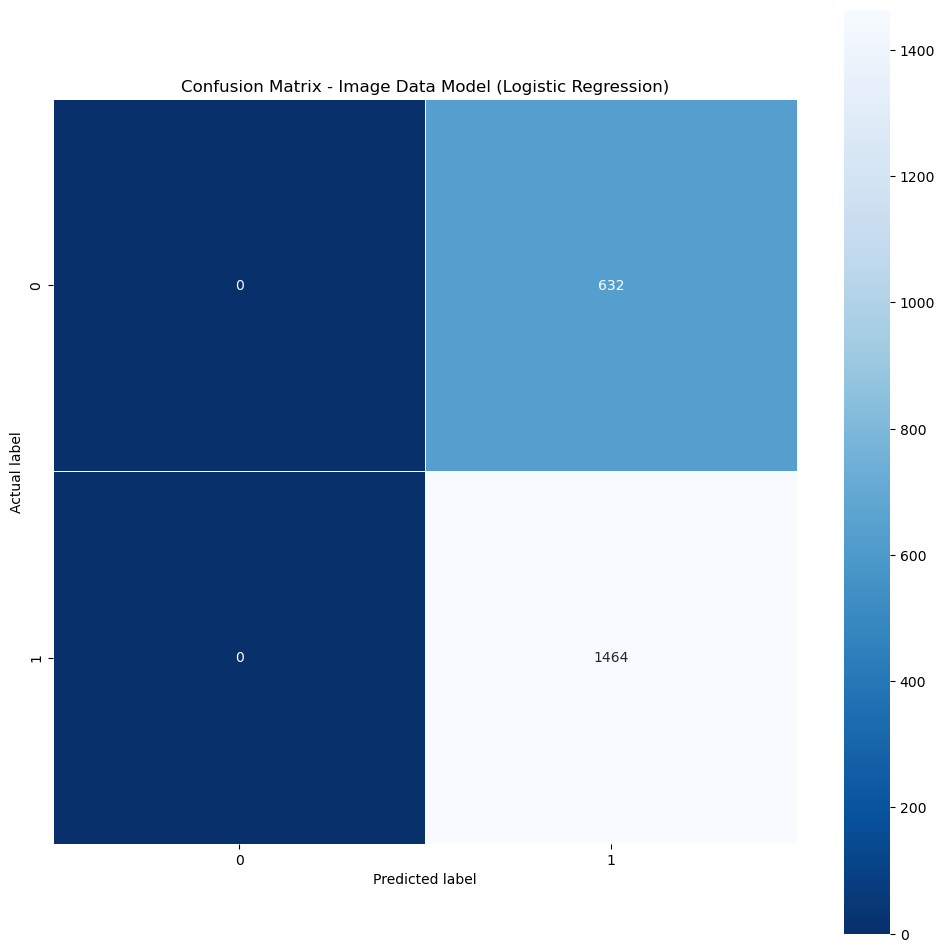

In [46]:
# Visualization for Image Data Model - Confusion Matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# y_pred already contains predictions from the image data model (reg_img)
# Create confusion matrix for image data model
cm_image = metrics.confusion_matrix(y_true=y_test,
                         y_pred=y_pred,
                        labels=[0,1])

plt.figure(figsize=(12,12))
sns.heatmap(cm_image, annot=True,
            linewidths=.5, square=True, cmap='Blues_r', fmt='d')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Image Data Model (Logistic Regression)')
plt.show()